<b>Importación de librerías</b>

En esta celda se importan todas las librerías que vamos a usar en el análisis. pandas y numpy sirven para manejar los datos, matplotlib.pyplot para hacer gráficos, y luego se importan herramientas de Scikit-learn y XGBoost que son necesarias para preparar los datos y entrenar el modelo. Es importante tener todas las librerías cargadas desde el principio.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

<b>Carga de datos</b>

Aquí cargamos los tres archivos principales: los datos de entrenamiento (train_features), las etiquetas o resultados conocidos (train_labels), y los datos de prueba (test_data). Se usa read_csv porque los archivos vienen en formato CSV. Es el primer paso para trabajar con el dataset, lo típico en cualquier análisis de datos.

In [4]:
train_features = pd.read_csv('Training Set Values.csv')
train_labels = pd.read_csv('Training Set Labels.csv')
test_data = pd.read_csv('Test Set Values.csv')


<b>Revisar dimensiones y primeras filas</b>

Estas tres celdas nos sirven para tener una idea rápida de cuántas filas y columnas tienen nuestros datasets, y cómo lucen las primeras entradas. Es útil para confirmar que todo se cargó bien.

In [6]:
print("Train features:", train_features.shape)
train_features.head(5)

Train features: (59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
print("Train labels:", train_labels.shape)
train_labels.head(5)

Train labels: (59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
print("Test data:", test_data.shape)
test_data.head(5)

Test data: (14850, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


<b>Info básica y estadísticas</b>

Aquí comprobamos cuántos datos faltan por columna (isnull), qué tipo de dato es cada columna (dtypes) y estadísticas básicas como la media, el mínimo, etc. Esto nos ayuda a ver qué variables necesitan limpieza o transformación.

In [10]:
print(train_features.isnull().sum().sort_values(ascending=False))

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
payment                      0
waterpoint_type              0
extraction_type_group        0
extraction_type_class        0
source_class                 0
management                   0
management_group             0
source_type                  0
source                       0
water_quality                0
quality_group                0
extraction_type              0
quantity                     0
quantity_group               0
payment_type                 0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region  

In [11]:
print(train_features.dtypes)

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [12]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


<b> Distribuciones </b>

Estas gráficas se usan para ver cómo se distribuyen algunas variables importantes antes de transformarlas. Ayudan a tomar decisiones sobre normalizaciones o codificaciones.

La primera gráfica (countplot) muestra cuántas muestras hay por cada clase de la variable objetivo (status_group). Es útil para ver si hay desbalanceo entre clases, que es algo que puede afectar al modelo si no se tiene en cuenta.

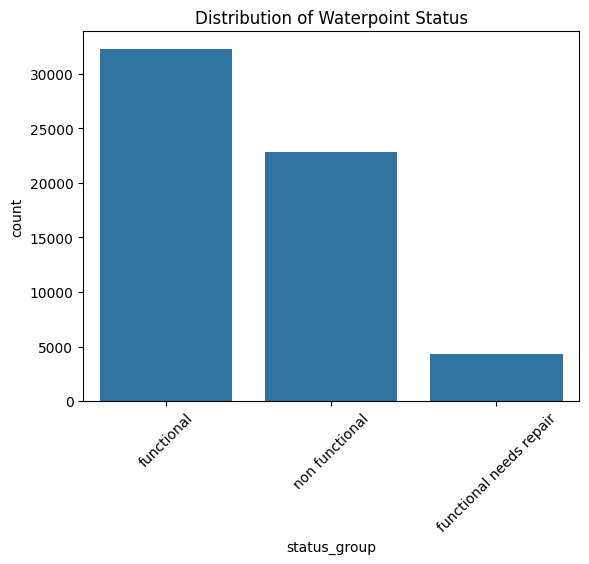

In [14]:
sns.countplot(data=train_labels, x='status_group')
plt.title('Distribution of Waterpoint Status')
plt.xticks(rotation=45)
plt.show()


La segunda (histplot) enseña cómo se distribuye la población. Normalmente esta variable tiene muchos valores pequeños y unos pocos muy grandes (distribución sesgada), por eso luego se aplica una transformación logarítmica. Esta gráfica justifica ese cambio.

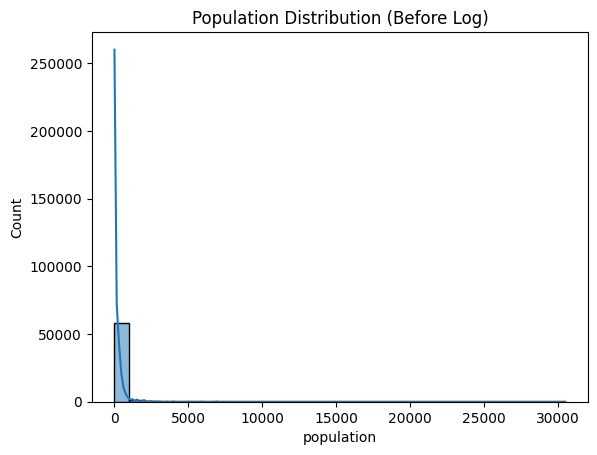

In [16]:
sns.histplot(data=train_features, x='population', bins=30, kde=True)
plt.title('Population Distribution (Before Log)')
plt.show()


<B> Unir features y etiquetas </b>

Juntamos las características y las etiquetas en un solo DataFrame (train) usando el id como clave. Esto facilita el preprocesado porque todo está en un mismo sitio.

In [18]:
train = train_features.merge(train_labels, on='id')

<b> Limpieza y creación de variables </b>

Prepara los datos limpiando y transformando columnas clave. Elimina columnas poco útiles, convierte la fecha para extraer año, mes y día, y corrige años de construcción inválidos (0 → NaN). Calcula la antigüedad de las infraestructuras, filtra valores inválidos de altura (gps_height ≤ 0 → NaN), y normaliza la población con log para evitar sesgos por valores extremos. Por último, borra la fecha original ya que ya se ha descompuesto.

In [20]:
columns_to_drop = ['scheme_name', 'recorded_by', 'wpt_name', 'num_private']
train.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

train['date_recorded'] = pd.to_datetime(train['date_recorded'])
test_data['date_recorded'] = pd.to_datetime(test_data['date_recorded'])

for df in [train, test_data]:
    df['year_recorded'] = df['date_recorded'].dt.year
    df['month_recorded'] = df['date_recorded'].dt.month
    df['day_recorded'] = df['date_recorded'].dt.day

train['construction_year'].replace(0, np.nan, inplace=True)
test_data['construction_year'].replace(0, np.nan, inplace=True)

train['age'] = train['year_recorded'] - train['construction_year']
test_data['age'] = test_data['year_recorded'] - test_data['construction_year']

train['gps_height'] = train['gps_height'].apply(lambda x: x if x > 0 else np.nan)
test_data['gps_height'] = test_data['gps_height'].apply(lambda x: x if x > 0 else np.nan)

train['population'] = np.log1p(train['population'])
test_data['population'] = np.log1p(test_data['population'])

train.drop(columns=['date_recorded'], inplace=True)
test_data.drop(columns=['date_recorded'], inplace=True)


<b> Codificar variables </b>

Se preparan los datos para el modelo. Primero, se convierten booleanos y objetos a strings para poder codificarlos. Luego se separan el target (y), los IDs y se definen X y X_test. Después, se aplica Label Encoding a las variables categóricas y al target para que todo quede en formato numérico y el modelo lo pueda procesar.

In [22]:
for df in [train, test_data]:
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(str)
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str)

y = train.pop('status_group')
train_id = train.pop('id')
test_id = test_data.pop('id')
X = train
X_test = test_data

cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    full_data = pd.concat([X[col], X_test[col]], axis=0).astype(str).fillna("unknown")
    le.fit(full_data)
    X[col] = le.transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


<b> Imputación de datos </b>

Se rellenan los valores que faltan usando la mediana (porque es más robusta ante outliers que la media). Muy importante para que el modelo no falle por culpa de valores vacíos.

In [24]:
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


<b> Entrenar el modelo </b> 

Aquí se entrena el modelo XGBoost, que es muy potente para tareas de clasificación. Los parámetros como n_estimators, max_depth o learning_rate controlan la complejidad y la velocidad del aprendizaje. El objective indica que queremos clasificación múltiple con 3 clases.

In [26]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    objective='multi:softmax',
    num_class=3
)

model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_class=3, ...)

<b> Hacer predicciones </b> 

Se hacen las predicciones con el modelo y luego se convierten de vuelta a texto (de números a 'functional', 'non functional', etc.) para poder exportarlas correctamente.

In [28]:
preds = model.predict(X_test)
preds = target_encoder.inverse_transform(preds)


<b> Archivo de envío </b>

Finalmente se crea el archivo CSV con las predicciones, listo para subir. Se mantiene el id original y la predicción de estado de cada bomba. También se muestra un preview de las primeras filas.

In [30]:
submission = pd.DataFrame({
    'id': test_id,
    'status_group': preds
})
submission.to_csv('submission.csv', index=False)
print("Submission file created.")
submission.head()


Submission file created.


,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
